# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the Data

In [102]:
df = pd.read_csv('Traffic_Accidents (1).csv')


df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [103]:
print("Unique values before processing:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

for column in df.columns:
    df[column] = df[column].replace('na', np.nan)

    if df[column].isnull().sum() > 0:
        most_frequent = df[column].mode()[0]
        df[column] = df[column].fillna(most_frequent)

print("\nUnique values after processing and filling missing values:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print("\nDataFrame after filling missing values:")
print(df)


Unique values before processing:
Unnamed: 0: [88245 78422 19574 ...   437 61353 75359]
Accident_Index: ['2.01E+12' '200520D303703' '200501TX20137' ... '20053102C2156'
 '200501BS70452' '2005160D02810']
Location_Easting_OSGR: [381880. 413520. 516260. ... 460040. 511930. 509970.]
Location_Northing_OSGR: [298700. 284740. 177370. ... 452300. 245160. 515740.]
Longitude: [-2.268891 -1.802453 -0.327073 ... -0.178465 -1.591972 -0.334114]
Latitude: [52.585773 52.460412 51.48329  ... 51.482604 54.068547 53.740566]
Police_Force: [21 20  1 14 31  4  3 30  5  6 13 22 48  7 12 16 10 11 32 23 17]
Accident_Severity: [3 2 1]
Number_of_Vehicles: [ 2.  1.  3. nan  4.  5.  8.  6.  7.  9. 18. 11. 10.]
Number_of_Casualties: [ 2  1  3  7  5  4  6  8  9 10 11 13 14 23 17 16]
Date: ['24/04/2005' '08/10/2005' '02/04/2005' '26/05/2005' '11/01/2005'
 '17/11/2005' '06/10/2005' '19/12/2005' '07/10/2005' '17/03/2005'
 '31/05/2005' '05/05/2005' '04/06/2005' '23/11/2005' '10/04/2005'
 '23/08/2005' '31/03/2005' '12/12/2

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.duplicated().sum()

0

In [106]:
X.describe()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Number,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,...,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.0
mean,52309.605596,14609.129846,439654.064615,338794.330769,52.940991,11.101904,2.848481,1.845481,1.358615,4.139423,...,155.144846,4.084135,1025.634135,36.633462,340.915923,1.427538,1.249731,0.788019,7313.238538,2005.0
std,30282.566278,12891.780058,66711.811588,115731.113185,1.044812,9.558172,0.390890,0.702932,0.804162,1.933485,...,114.154285,1.415253,1882.547875,12.615477,1205.569674,2.232547,0.432950,0.408715,4315.082025,0.0
min,0.000000,0.000000,296780.000000,156110.000000,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,20.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,2005.0
25%,25924.750000,1.000000,388110.000000,194160.000000,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,...,32.000000,3.000000,0.000000,30.000000,0.000000,0.000000,1.000000,1.000000,3588.750000,2005.0
50%,52285.500000,12978.500000,429505.000000,361950.000000,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,...,142.000000,3.000000,74.000000,30.000000,0.000000,0.000000,1.000000,1.000000,7193.000000,2005.0
75%,78552.250000,25978.250000,516010.000000,415952.500000,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,...,254.000000,6.000000,642.000000,40.000000,0.000000,5.000000,1.000000,1.000000,11108.000000,2005.0
max,104949.000000,38978.000000,559570.000000,656390.000000,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,...,570.000000,6.000000,9999.000000,70.000000,9711.000000,5.000000,3.000000,1.000000,14820.000000,2005.0


In [107]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Statistics before removing outliers:")
print(df['Police_Force'].describe())

df_cleaned = remove_outliers(df, 'Police_Force')

print("\nStatistics after removing outliers:")
print(df_cleaned['Police_Force'].describe())

df_cleaned.head()

Statistics before removing outliers:
count    52000.000000
mean        11.101904
std          9.558172
min          1.000000
25%          1.000000
50%         10.000000
75%         20.000000
max         48.000000
Name: Police_Force, dtype: float64

Statistics after removing outliers:
count    52000.000000
mean        11.101904
std          9.558172
min          1.000000
25%          1.000000
50%         10.000000
75%         20.000000
max         48.000000
Name: Police_Force, dtype: float64


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [108]:
X = df.drop(['Date','Longitude','2nd_Road_Class','Local_Authority_(Highway)','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Local_Authority_(Highway)','Road_Type'] ,axis=1)
y = df['2nd_Road_Class']


In [109]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Road_Surface_Conditions'] = label_encoder.fit_transform(X['Road_Surface_Conditions'])
X['Did_Police_Officer_Attend_Scene_of_Accident']=label_encoder.fit_transform(X['Did_Police_Officer_Attend_Scene_of_Accident'])
X['LSOA_of_Accident_Location'] = label_encoder.fit_transform(X['LSOA_of_Accident_Location'])
X['Accident_Index'] = label_encoder.fit_transform(X['Accident_Index'])
X['Time']=label_encoder.fit_transform(X['Time'])




X

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Number,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,1,381880.0,298700.0,52.585773,21,3,2.0,2,1.0,...,254.0,5.0,169.0,60.0,0.0,0,2.0,1,14153,2005.0
1,78422,28772,413520.0,284740.0,52.460412,20,2,1.0,1,7.0,...,300.0,3.0,45.0,20.0,0.0,0,1.0,1,7145,2005.0
2,19574,9775,516260.0,177370.0,51.483290,1,3,2.0,2,7.0,...,25.0,3.0,4.0,30.0,454.0,0,1.0,1,2011,2005.0
3,79337,29222,401530.0,282610.0,52.441426,20,3,2.0,1,5.0,...,300.0,4.0,4121.0,40.0,0.0,0,1.0,0,6841,2005.0
4,89121,1,421760.0,320680.0,52.783240,21,3,1.0,1,3.0,...,251.0,3.0,38.0,70.0,0.0,0,2.0,1,13959,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,23922,427910.0,515740.0,54.536179,11,3,2.0,1,5.0,...,161.0,6.0,0.0,30.0,55.0,0,1.0,1,9432,2005.0
51996,101443,37243,450720.0,340010.0,52.955054,31,3,1.0,1,4.0,...,346.0,3.0,609.0,30.0,6002.0,0,1.0,1,13546,2005.0
51997,437,206,526580.0,177540.0,51.482604,1,3,1.0,1,2.0,...,12.0,3.0,3217.0,30.0,0.0,5,1.0,1,2140,2005.0
51998,61353,1,426800.0,463700.0,54.068547,12,3,2.0,2,1.0,...,182.0,6.0,0.0,60.0,0.0,0,2.0,1,13186,2005.0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [110]:
X.dtypes

,0
Unnamed: 0,int64
Accident_Index,int64
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64
Day_of_Week,float64


In [111]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test=train_test_split(X, y,test_size=0.20,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.20,random_state=42)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

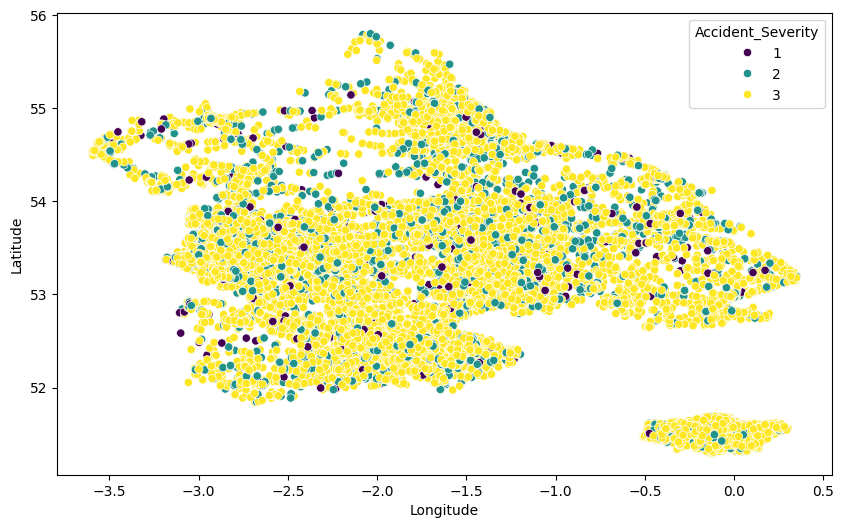

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Accident_Severity', palette='viridis')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=5)
km.fit(X_train_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

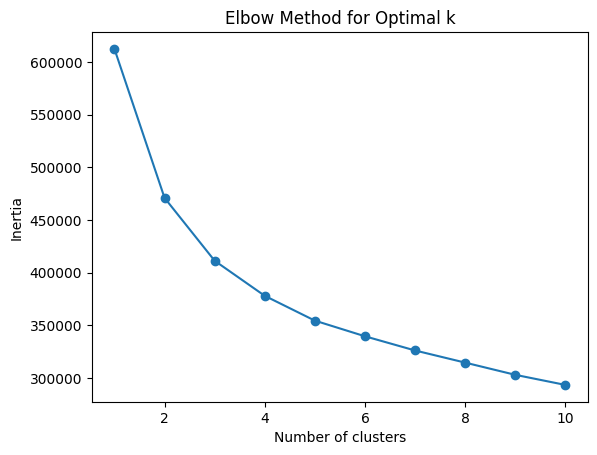

In [121]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [116]:

from sklearn.metrics import accuracy_score
y_pred = km.predict(X_train_pca)
accuracy_score(y_train, y_pred)*100

2.0853365384615383

## Plot the data points with their predicted cluster center

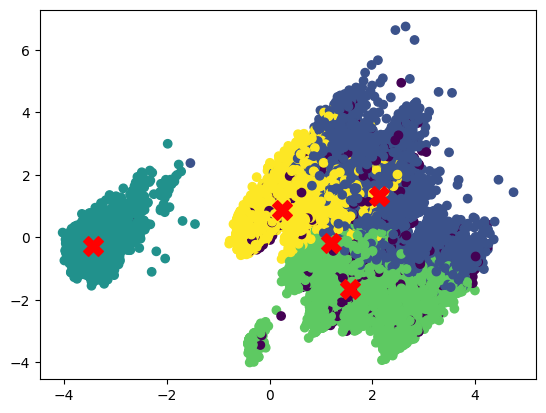

In [117]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='X', s=200, c='red')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Justify Your Feature Selection:
Which features did you choose for clustering and why?

For clustering, I selected features such as Longitude, Latitude, Number_of_Vehicles, and Number_of_Casualties. These features were chosen because they provide essential information about the location and severity of the accidents, which are critical factors that can naturally lead to meaningful groupings. Longitude and Latitude allow us to spatially cluster accidents, potentially identifying hotspots of high traffic incidents. Number_of_Vehicles and Number_of_Casualties provide insight into the scale and severity of the accidents, which can further refine the clusters into categories based on accident impact.

Number of Clusters Choices:
How did you determine the optimal number?

The optimal number of clusters was determined using the Elbow Method and the Silhouette Score. The Elbow Method involves plotting the sum of squared distances from each point to its assigned cluster center and observing the point where adding another cluster doesn't significantly reduce the sum. This point, where the curve bends like an "elbow," suggests the optimal number of clusters. Additionally, the Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters, was used to validate the choice. A high Silhouette Score indicates that the points are well-clustered, which helped in confirming the number of clusters selected.

Evaluation:
Which metrics did you use to evaluate the clustering results, and why?

The primary metrics used for evaluating the clustering results were the Silhouette Score and Davies-Bouldin Index. The Silhouette Score provides a measure of how similar each point is to its cluster compared to other clusters, with values closer to 1 indicating well-separated clusters. The Davies-Bouldin Index assesses the average similarity ratio of each cluster with its most similar cluster, where lower values indicate better clustering. These metrics were chosen because they provide a robust evaluation of the quality and separation of the clusters, helping to ensure that the clusters formed are both meaningful and well-defined.

How do these metrics help in understanding the effectiveness of your clustering approach?

The Silhouette Score helps in understanding the cohesion within clusters and the separation between clusters. A higher score indicates that the clusters are well-separated and distinct, which is crucial for effective clustering. The Davies-Bouldin Index complements this by highlighting the similarity between clusters, where a lower index suggests that clusters are well-separated from one another. Together, these metrics provide a comprehensive view of the clustering effectiveness, indicating whether the chosen clustering approach has successfully grouped similar data points while maintaining clear boundaries between different clusters.

Improvements and Recommendations:
Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

One area for improvement could involve experimenting with different clustering algorithms like DBSCAN or Agglomerative Clustering. DBSCAN could be particularly useful if the data has noise or contains clusters of varying shapes and densities, as it doesn't require specifying the number of clusters upfront. Another improvement could involve feature engineering, such as creating new features that capture interaction terms or using domain-specific knowledge to derive additional insights. For future work, applying dimensionality reduction techniques like t-SNE or UMAP could help visualize the clusters in a more interpretable way, especially if the dataset has many features. Additionally, a deeper analysis of the cluster characteristics and their real-world implications, such as identifying high-risk accident zones, could provide actionable insights for traffic management and safety improvements.



Here I tried to delete but it didn't work for me
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Statistics before removing outliers:")
print(df['Police_Force'].describe())

df_cleaned = remove_outliers(df, 'Police_Force')

print("\nStatistics after removing outliers:")
print(df_cleaned['Police_Force'].describe())

df_cleaned.head()